# Simon function periodicity

In [6]:
from qlasskit import qlassf, Qint


@qlassf
def f(a: Qint[4]) -> Qint[4]:
    return (a >> 3) + 1

QlassF<oracle>(a:Qint4) -> bool:
	_ret = ~(~a.0 & ~a.3)


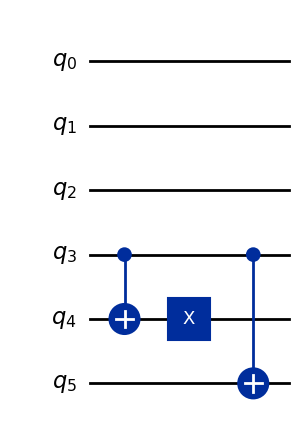

In [2]:
f.export("qiskit").draw("mpl")

In [3]:
from qlasskit.algorithms import Simon

q_algo = Simon(f)

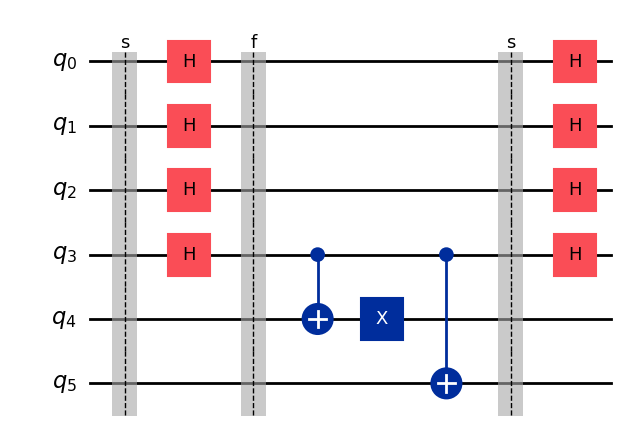

In [4]:
qc = q_algo.export("qiskit")
qc.draw("mpl")

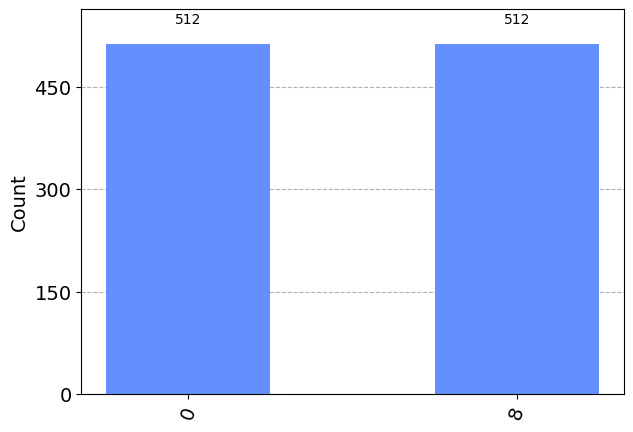

In [5]:
from qiskit import QuantumCircuit, transpile
from qiskit.visualization import plot_histogram
from qiskit_aer import AerSimulator

qc.measure_all()
simulator = AerSimulator()
circ = transpile(qc, simulator)
result = simulator.run(circ).result()
counts = result.get_counts(circ)

counts_readable = q_algo.decode_counts(counts)
plot_histogram(counts_readable)